In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import normaltest
import warnings

In [2]:
warnings.filterwarnings(action="ignore")

In [3]:
data=pd.read_csv("Sachin_ODI.csv")

In [4]:
data.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [5]:
data.shape

(360, 14)

In [6]:
data.isna().sum()

runs       0
NotOut     0
mins       0
bf         0
fours      0
sixes      0
sr         0
Inns       0
Opp        0
Ground     0
Date       0
Winner     0
Won        0
century    0
dtype: int64

In [7]:
any(data.duplicated())

False

In [8]:
data.describe()

,runs,NotOut,bf,fours,sixes,sr,Inns
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,43.241667,0.083333,49.394444,4.858333,0.466667,75.295056,1.527778
std,42.182452,0.276770,41.348576,4.722900,1.057669,34.980677,0.499923
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,8.000000,0.000000,15.000000,1.000000,0.000000,57.030000,1.000000
50%,30.000000,0.000000,35.000000,3.000000,0.000000,76.330000,2.000000
75%,67.000000,0.000000,73.500000,8.000000,1.000000,97.822500,2.000000
max,200.000000,1.000000,153.000000,25.000000,7.000000,196.550000,2.000000


In [9]:
data.describe(include="object")

,mins,Opp,Ground,Date,Winner
count,360,360,360,360,360
unique,154,15,85,360,13
top,-,Sri Lanka,Sharjah,1995-02-16,India
freq,22,63,31,1,184


In [10]:
data.dtypes

runs         int64
NotOut       int64
mins        object
bf           int64
fours        int64
sixes        int64
sr         float64
Inns         int64
Opp         object
Ground      object
Date        object
Winner      object
Won           bool
century       bool
dtype: object

In [11]:
data["Date"]=pd.to_datetime(data["Date"],format="%Y-%m-%d")

In [12]:
data["Inns"]=data["Inns"].astype("str")

In [13]:
data["month"]=data["Date"].dt.month
data["year"]=data["Date"].dt.year

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

### All calculations are done at a 5 percent signifance level.

In [14]:
alpha=0.05

In [15]:
def crosstab(x,y):
    """
    This function returns a crosstab for two categorical columns from the dataset
    """
    return pd.crosstab(index=data[x],columns=data[y])

In [16]:
def chi2test(x,y):
    """
    This function returns p-value for chi-square test between two categorical columns
    """
    _,p,_,_=chi2_contingency(pd.crosstab(index=data[x],columns=data[y]))
    return p

In [17]:
def accept_reject(p):
    """
    This function prints if the null hypothesis should be accepted or rejected at global alpha level
    """
    global alpha
    if p<alpha:
        x="Reject H0"
    elif p>=alpha:
        x="Failed to Reject H0"
    else:
        raise ValueError
    print(f"p-value= {p}")
    print(f"{x} at a {alpha*100}% significance level")    

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Sachin hitting a century and team winning

In [18]:
crosstab("Won","century")

century,False,True
Won,,
False,160,16
True,154,30


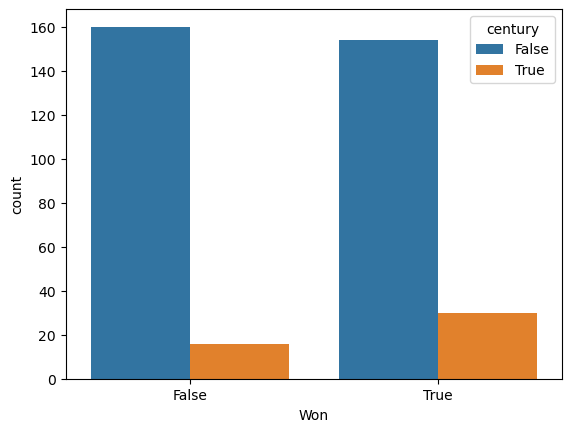

In [19]:
sns.countplot(data,x="Won",hue="century")
plt.show()

H0: There is no statistically significant relationship between Sachin hitting a century and team winning.

HA: There is a statistically significant relationship between Sachin hitting a century and team winning 

Significance level= 5%

In [20]:
p=chi2test("Won","century")
accept_reject(p)

p-value= 0.05856653223833202
Failed to Reject H0 at a 5.0% significance level


Hence, We accept that There is no statistically significant relationship between Sachin hitting a century and team winning.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Sachin remaining Not Out and Team Winning

In [21]:
crosstab("NotOut","Won")

Won,False,True
NotOut,,
0,172,158
1,4,26


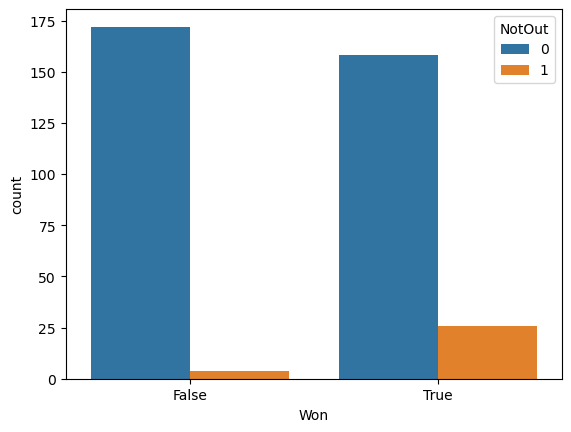

In [22]:
sns.countplot(data,x="Won",hue="NotOut")
plt.show()

H0: There is no statistically significant relationship between Sachin remaining not out and team winning.

HA: There is a statistically significant relationship between Sachin remaining not out and team winning.

Significance level= 5%

In [23]:
p=chi2test("NotOut","Won")
accept_reject(p)

p-value= 0.0001051577146484091
Reject H0 at a 5.0% significance level


Hence, There is a statistically significant relationship between Sachin remaining not out and team winning.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Sachin hitting a Century and Ground

In [24]:
crosstab("Ground","century")

century,False,True
Ground,,
Adelaide,5,0
Ahmedabad,3,1
Amritsar,1,0
Auckland,2,0
Belfast,4,0
...,...,...
The Oval,4,0
Toronto,11,0
Vadodara,4,2


H0: There is no statistically significant relationship between Sachin's century and ground.

HA: There is a statistically significant relationship between Sachin's century and ground.

Significance level= 5%

In [25]:
p=chi2test("Ground","century")
accept_reject(p)

p-value= 0.15959923768897666
Failed to Reject H0 at a 5.0% significance level


Hence, We accept that There is no statistically significant relationship between Sachin's century and the ground.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Sachin hitting a Century and Opposition

In [26]:
crosstab("Opp","century")

century,False,True
Opp,,
Australia,53,8
Bangladesh,9,1
Bermuda,1,0
England,23,2
Ireland,2,0
Kenya,5,4
Namibia,0,1
Netherlands,2,0
New Zealand,28,4


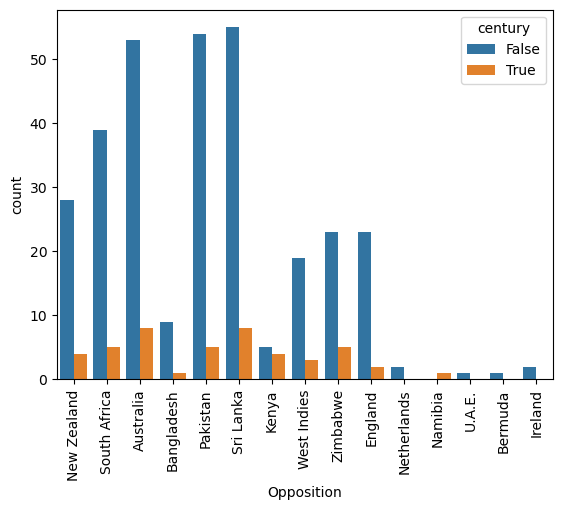

In [27]:
sns.countplot(data,x="Opp",hue="century")
plt.xticks(rotation=90)
plt.xlabel("Opposition")
plt.show()

H0: There is no significant relationship relationship between Sachin's century and Opposition.

HA: There is a statistically significant relationship between Sachin's century and Opposition.

Significance level= 5%

In [28]:
p=chi2test("Opp","century")
accept_reject(p)

p-value= 0.20159960746150968
Failed to Reject H0 at a 5.0% significance level


Hence, We accept that There is no statistically significant relationship between Sachin's century and Opposition.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Sachin hitting a Century and Month of the year

In [29]:
crosstab("month","century")

century,False,True
month,,
1,37,1
2,43,6
3,36,8
4,26,7
5,9,3
6,16,0
7,14,4
8,11,2
9,34,3


H0: There is no significant relationship relationship between Sachin hitting a century and Month of the year.

HA: There is a statistically significant relationship between Sachin hitting a century and Month of the year.

Significance level= 5%

In [30]:
p=chi2test("month","century")
accept_reject(p)

p-value= 0.28852323779846606
Failed to Reject H0 at a 5.0% significance level


Hence, We accept that There is no significant relationship relationship between Sachin hitting a century and Month of the year.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Average runs scored in Won/Lost Matches

In [31]:
data.groupby("Won").agg(avg_runs=("runs","mean"))

,avg_runs
Won,
False,35.130682
True,51.000000


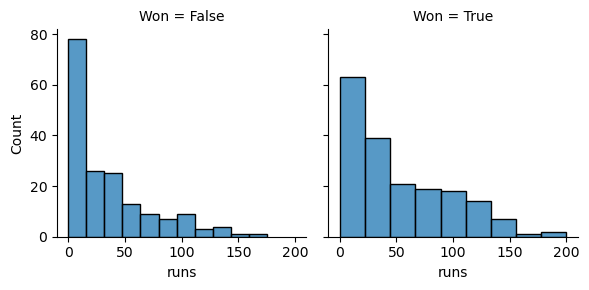

In [32]:
sns.FacetGrid(data,col="Won").map(sns.histplot,"runs")
plt.show()

H0: There is no difference in average runs scored by Sachin in Won/Lost matches.
    
HA: Average runs scored by Sachin in Won matches is greater than those scored in lost matches.

Significance Level= 5%

In [33]:
won_runs=data.loc[data["Won"]==True,"runs"]
loss_runs=data.loc[data["Won"]==False,"runs"]

In [34]:
_,p=ttest_ind(won_runs,loss_runs,alternative="greater")
accept_reject(p)

p-value= 0.00016353077486826558
Reject H0 at a 5.0% significance level


Therefore, Average runs scored by Sachin in Won matches is greater than those scored in lost matches.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Average Runs scored against different opposition

In [35]:
opp_data=data.groupby("Opp").agg(total_runs=("runs","sum"),avg_runs=("runs","mean"),
                                 inns_count=("Inns","count")).sort_values("avg_runs",ascending=False).reset_index()
opp_data

,Opp,total_runs,avg_runs,inns_count
0,Namibia,152,152.000000,1
1,Kenya,647,71.888889,9
2,Bermuda,57,57.000000,1
3,England,1168,46.720000,25
4,Bangladesh,460,46.000000,10
5,Australia,2732,44.786885,61
6,West Indies,968,44.000000,22
7,Sri Lanka,2757,43.761905,63
8,Zimbabwe,1222,43.642857,28
9,South Africa,1758,39.954545,44


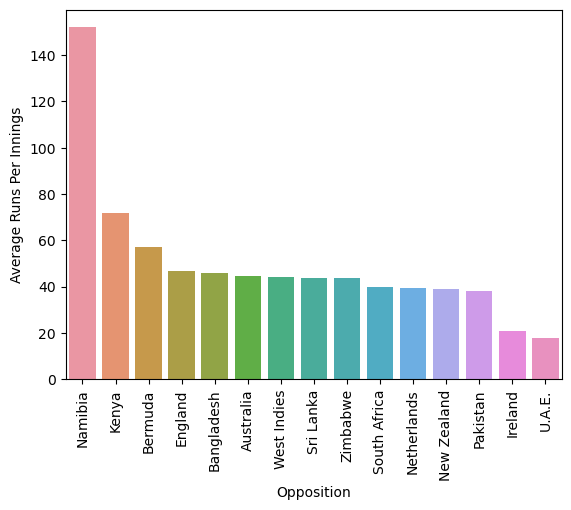

In [36]:
sns.barplot(opp_data,x="Opp",y="avg_runs")
plt.xticks(rotation=90)
plt.xlabel("Opposition")
plt.ylabel("Average Runs Per Innings")
plt.show()

In [37]:
opp=data["Opp"].unique()
opp_var_name=list(map(lambda i: i.replace(" ","_"),opp))
opp_var_name=list(map(lambda i: i.replace(".","_"),opp_var_name))

In [38]:
for val,var in zip(opp,opp_var_name):
    globals()[var]=data.loc[data["Opp"]==val,"runs"]

In [39]:
#generating parameters for kruskal test
for index,val in enumerate(opp_var_name):
    if index!=len(opp_var_name)-1:
        print(val,end=",")
    else:
        print(val)

New_Zealand,South_Africa,Australia,Bangladesh,Pakistan,Sri_Lanka,Kenya,West_Indies,Zimbabwe,England,Netherlands,Namibia,U_A_E_,Bermuda,Ireland


H0: There is no statistically significant difference in average runs scored by Sachin Against different opponents.
    
HA: There is a statistically significant difference in average runs scored by Sachin Against different opponents..

Significance Level= 5%

In [40]:
_,p=kruskal(New_Zealand,South_Africa,Australia,Bangladesh,Pakistan,Sri_Lanka,Kenya,
              West_Indies,Zimbabwe,England,Netherlands,Namibia,U_A_E_,Bermuda,Ireland)
accept_reject(p)

p-value= 0.7033827783014067
Failed to Reject H0 at a 5.0% significance level


Hence, We accept that there is no statistically significant difference in average runs scored by Sachin Against different opponents.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Average runs scored in First and Second Innings

In [41]:
data.groupby("Inns").agg(avg_runs=("runs","mean"))

,avg_runs
Inns,
1,46.670588
2,40.173684


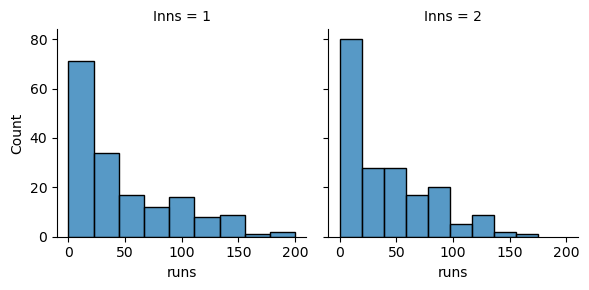

In [42]:
sns.FacetGrid(data,col="Inns").map(sns.histplot,"runs")
plt.show()

H0: There is no statistically significant difference between the Average runs scored by Sachin in First and Second Innings.
    
HA: There is a statistically significant difference between the Average runs scored by Sachin in First and Second Innings.

Significance Level= 5%

In [43]:
first_inns_runs=data.loc[data["Inns"]=="1","runs"]
second_inns_runs=data.loc[data["Inns"]=="2","runs"]

In [44]:
_,p=ttest_ind(first_inns_runs,second_inns_runs)
accept_reject(p)

p-value= 0.14483724194759962
Failed to Reject H0 at a 5.0% significance level


Hence, We accept that there is no statistically significant difference between the Average runs scored by Sachin in First and Second Innings.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Average Strike Rate across First and Second Innings

In [45]:
data.groupby("Inns").agg(avg_strikerate=("sr","mean"))

,avg_strikerate
Inns,
1,73.133235
2,77.229316


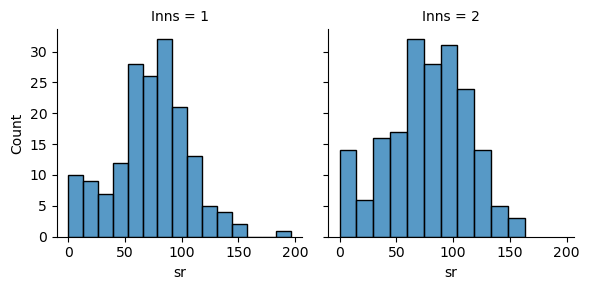

In [46]:
sns.FacetGrid(data,col="Inns").map(sns.histplot,"sr")
plt.show()

H0: There is no statistically significant difference between the Average Strike Rate of Sachin across First and Second Innings.
    
HA: There is a statistically significant difference between the Average Strike Rate of Sachin across First and Second Innings.

Significance Level= 5%

In [47]:
first_inns_sr=data.loc[data["Inns"]=="1","sr"]
second_inns_sr=data.loc[data["Inns"]=="2","sr"]

In [48]:
_,p=ttest_ind(first_inns_sr,second_inns_sr)
accept_reject(p)

p-value= 0.2679563367608401
Failed to Reject H0 at a 5.0% significance level


Hence, We accept that there is no statistically significant difference between the Average Strike Rate of Sachin across First and Second Innings.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Average Strike Rate across Won and Lost Matches

In [49]:
data.groupby("Won").agg(avg_sr=("sr","mean"))

,avg_sr
Won,
False,69.055170
True,81.263641


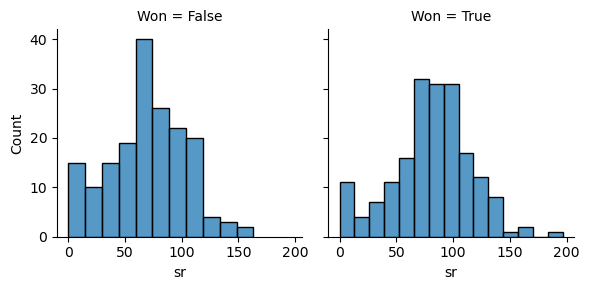

In [50]:
sns.FacetGrid(data,col="Won").map(sns.histplot,"sr")
plt.show()

H0: There is no statistically significant difference between the Average Strike Rate of Sachin in Won and Lost Matches.
    
HA: The Average Strike Rate of Sachin in Won matches is greater than Average Strike Rate in Lost Matches.

Significance Level= 5%

In [51]:
won_sr=data.loc[data["Won"]==True,"sr"]
lost_sr=data.loc[data["Won"]==False,"sr"]

In [52]:
_,p=ttest_ind(won_sr,lost_sr,alternative="greater")
accept_reject(p)

p-value= 0.0004360106757143459
Reject H0 at a 5.0% significance level


Hence, We accept that The Average Strike Rate of Sachin in Won matches is greater than the Average Strike Rate in Lost Matches.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Average Balls Faced during First and Second Innings

In [53]:
data.groupby("Inns").agg(avg_balls_faced=("bf","mean"))

,avg_balls_faced
Inns,
1,54.405882
2,44.910526


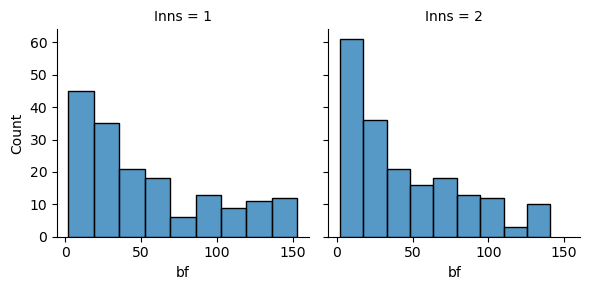

In [54]:
sns.FacetGrid(data,col="Inns").map(sns.histplot,"bf")
plt.show()

H0: There is no statistically significant difference between the Average Balls Faced by Sachin during First and Second Innings.
    
HA: There is a statistically significant difference between the Average Balls Faced by Sachin during First and Second Innings.

Significance Level= 5%

In [55]:
first_inns_bf=data.loc[data["Inns"]=="1","bf"]
second_inns_bf=data.loc[data["Inns"]=="2","bf"]

In [56]:
_,p=ttest_ind(first_inns_bf,second_inns_bf,alternative="greater")
accept_reject(p)

p-value= 0.01470804520421016
Reject H0 at a 5.0% significance level


Hence, There is a statistically significant difference between the Average Balls Faced by Sachin during First and Second Innings.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Average runs scored during different months of the year

In [57]:
data.groupby("month").agg(avg_runs=("runs","mean"))

,avg_runs
month,
1,32.026316
2,41.734694
3,52.272727
4,43.848485
5,40.416667
6,48.000000
7,48.388889
8,48.692308
9,36.243243


H0: Runs scored is Normally Distributed

HA: Runs scored is not Normally Distributed

Significance Level: 5%

In [58]:
_,p=normaltest(data["runs"])
accept_reject(p)

p-value= 3.7059399471249535e-12
Reject H0 at a 5.0% significance level


Hence, Runs scored is not Normally Distributed

In [59]:
for i in list(data["Date"].dt.month_name().unique()):
    globals()[i]=data.loc[data["Date"].dt.month_name()==i,"runs"]

In [60]:
#generating parameter for kruskal test
for index,mon in enumerate(list(data["Date"].dt.month_name().unique())):
    if index!=len(data["Date"].dt.month_name().unique())-1:
        print(mon,end=",")
    else:
        print(mon)

February,April,November,March,May,August,September,October,December,January,July,June


H0: There is no statistically significant difference in the average runs scored by Sachin during different months of the year.

H0: There is a statistically significant difference in the average runs scored by Sachin during different months of the year.

Significance Level: 5%

In [61]:
_,p=kruskal(February,April,November,March,May,August,September,October,December,January,July,June)
accept_reject(p)

p-value= 0.5396563116726798
Failed to Reject H0 at a 5.0% significance level


Hence, We accept that there is no statistically significant difference in the average runs scored by Sachin during different months of the year.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------

#### Average Minutes batted during First and Second Innings

In [62]:
mod_data=data[data["mins"]!="-"]
mod_data["mins"]=mod_data["mins"].astype("float")
mod_data.groupby("Inns").agg(avg_mins=("mins","mean"))

,avg_mins
Inns,
1,79.751592
2,70.751381


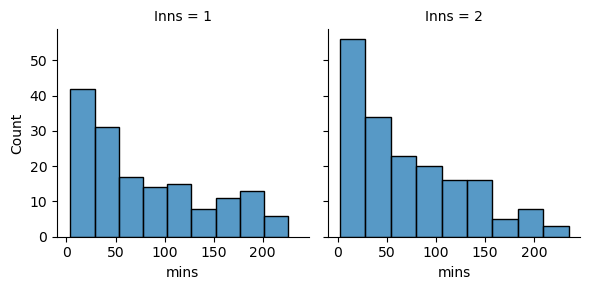

In [63]:
sns.FacetGrid(mod_data,col="Inns").map(sns.histplot,"mins")
plt.show()

H0: There is no statistically significant difference between the Average Minutes batted by Sachin during First and Second Innings.
    
HA: There is a statistically significant difference between the Average Minutes batted by Sachin during First and Second Innings.

Significance Level= 5%

In [64]:
first_inns_mins=mod_data.loc[mod_data["Inns"]=="1","mins"]
second_inns_mins=mod_data.loc[mod_data["Inns"]=="2","mins"]

In [65]:
_,p=ttest_ind(first_inns_mins,second_inns_mins)
accept_reject(p)

p-value= 0.1680637106471735
Failed to Reject H0 at a 5.0% significance level


Hence, We accept that there is no statistically significant difference between the Average Minutes batted by Sachin during First and Second Innings.

--------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------